### **EXPLORATIVE DATA ANALYSIS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df= pd.read_csv("winequality-white.csv", sep=';')

In [4]:
# print the first 5 elements of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# print the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As we can see, the dataset has 12 columns with almost 5000 observations with non-null values. Besides the quality column which is an integer, every other feature is a float type. We can now check wheter there are NaN values or not

In [6]:
# check if there are NaN values 
nan_val = df.isna().sum()
print("Number of NaN values:")
print(nan_val)

Number of NaN values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# check how many unique values are in the dataset
print("Unique values are:")
print(df.nunique())

Unique values are:
fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


A possible change in our dataset can be done by converting the quantitative variable "quality" into a qualitative one

In [8]:
# check the maximum and minimum value
df["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [9]:
# Creating the categories
categories = ['Really-Low', 'Low', 'Medium', 'High', 'Really-High']

# Range of each category
ints = [1,4,6,7,9,10]

In [10]:
df['qualRange'] = pd.cut(df['quality'], bins=ints, labels=categories, right=False)

In [11]:
# View of the new dataset with the new column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualRange
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


We can proceed to analyze the qualitative data

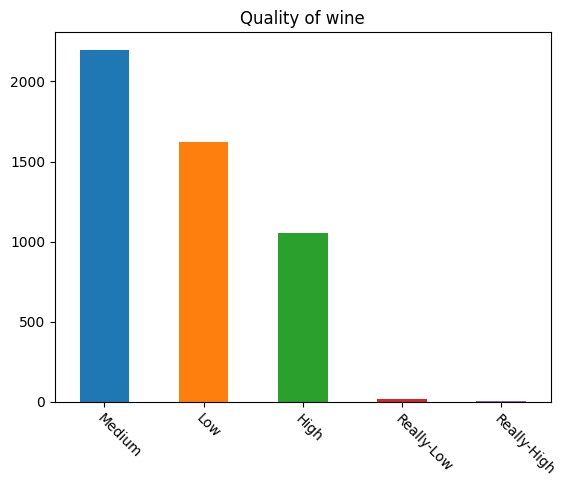

In [12]:
# array of colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#33ff33"]

ax = df["qualRange"].value_counts().plot(kind="bar", color = colors)

# labels on the plot
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") # rotation and alignment of text
plt.title("Quality of wine")  # title
plt.xlabel("")

# plot
plt.show()

Let's plot some boxplots conditioned by the qualitative variable in order to have a better vision

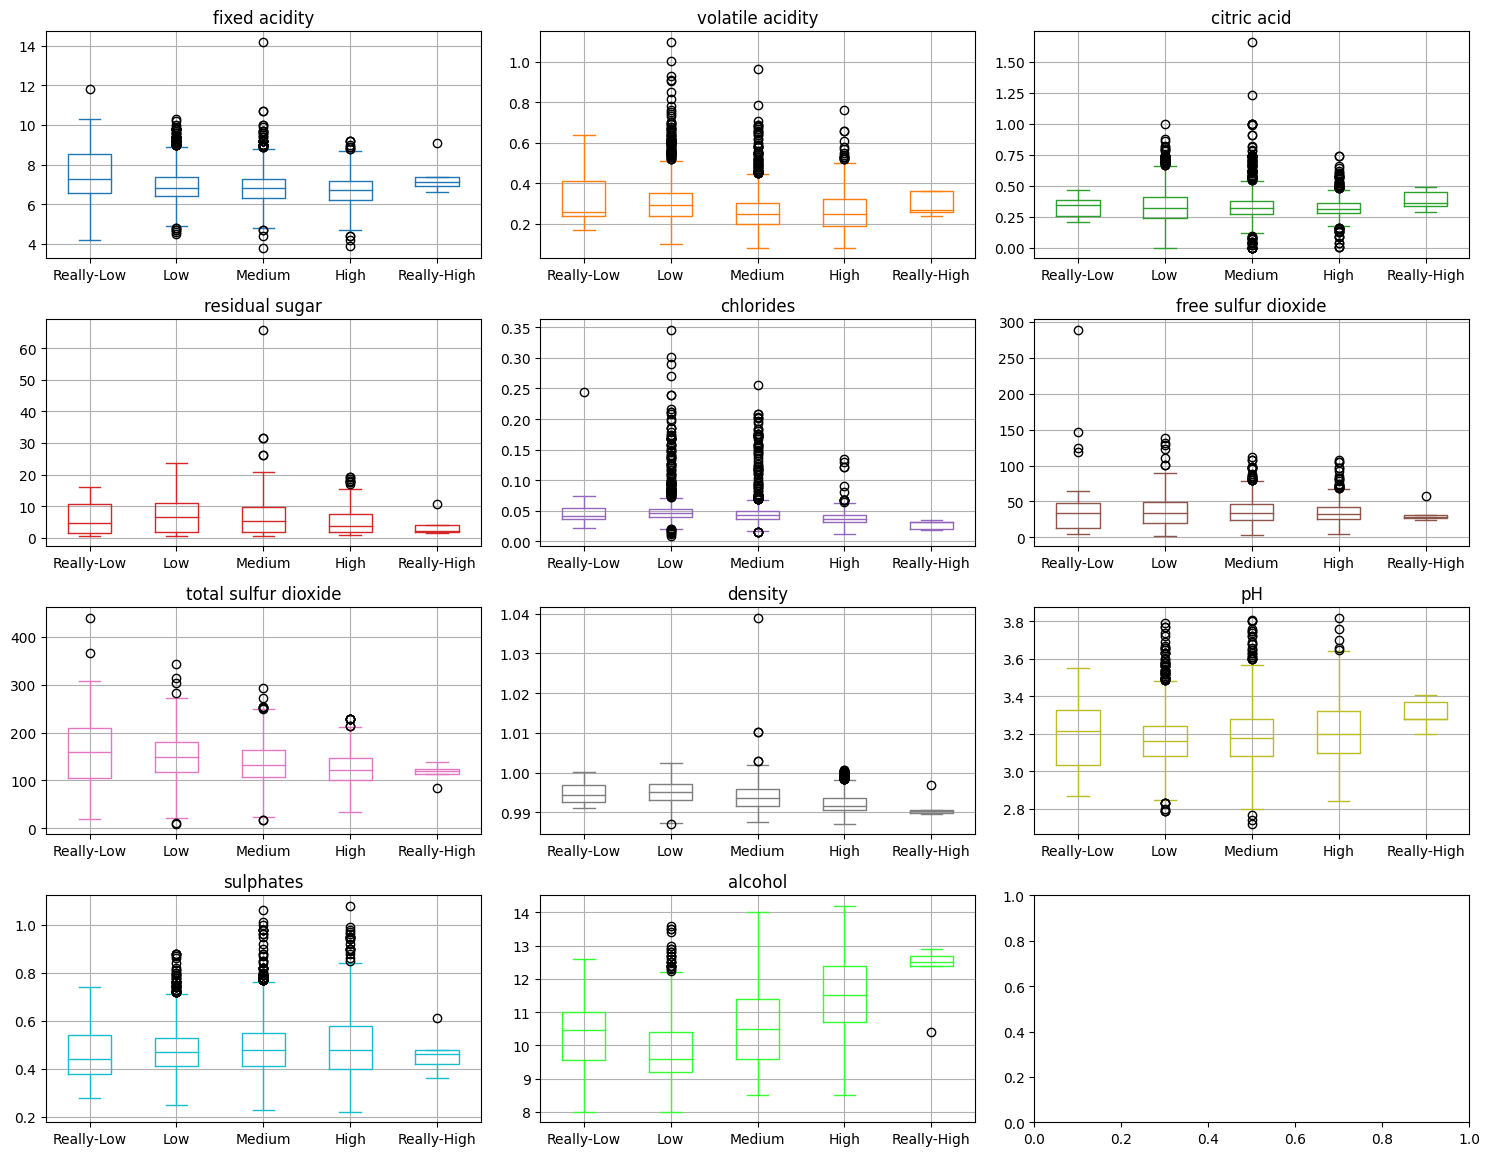

In [13]:
fig, ax = plt.subplots(nrows=4,ncols=3, figsize=(15, 12))
# indexes for plotting
row_index = 0 
col_index = 0

# iterating for every column besides the qualitative one 
for i, col in enumerate(df.columns[0:-2]):
    row_index = i // 3
    col_index = i % 3
    
    df.boxplot(column = col, by = 'qualRange', ax=ax[row_index, col_index], color=colors[i])
    ax[row_index, col_index].set_xlabel('')  # x label
 
# show plot
plt.tight_layout()  # better view of plots
fig.suptitle("")
plt.show()

We can see that in certain features (such as alcohol) we have that the quality of the wine is greatly influenced by this column's values

We now proceed to visualize the correlation between our quantitative variables

<Axes: title={'center': 'Correlation map'}>

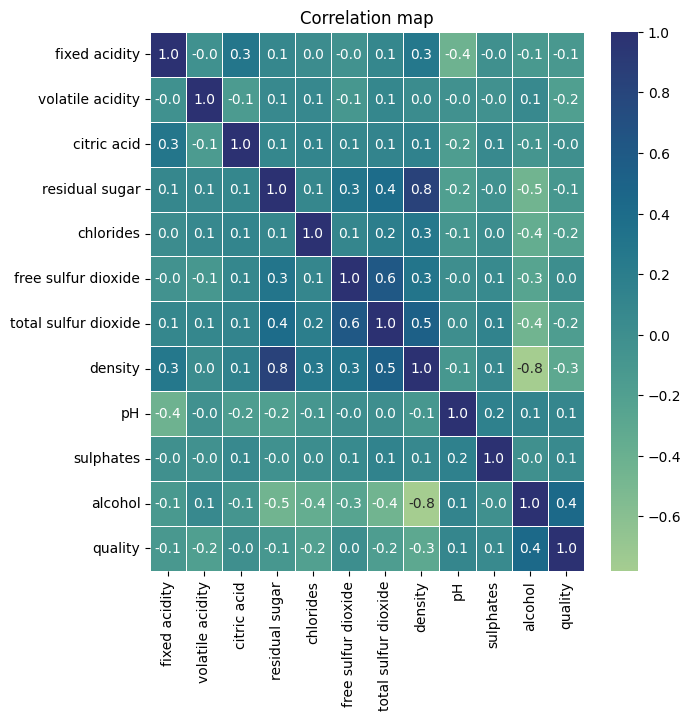

In [14]:
# correlation map for features
f,ax = plt.subplots(figsize=(7, 7))
ax.set_title('Correlation map')
sns.heatmap(df.loc[:, df.columns != 'qualRange'].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="crest")

As we can see there is not a big correlation between our variables, the only two couples who are interesting are "residual sugar/density" and "density/alcohol" with a correlation of 0.8 and -0.8, meaning that there is a linear correlation between those 2 couples, one with positive slope and one with negative slope

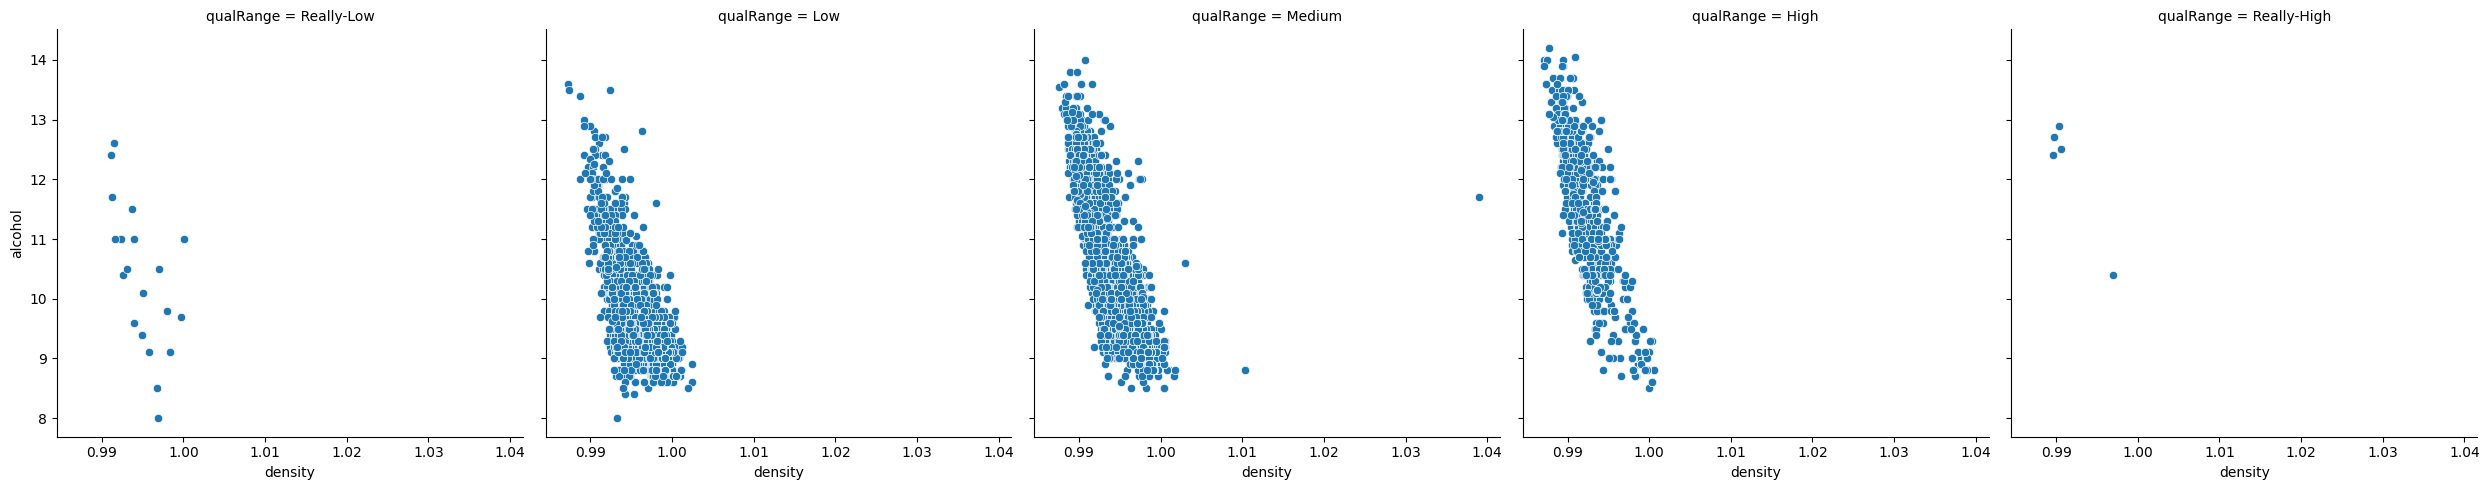

In [15]:
# getting an idea about the distribution of wine density 
sns.relplot(x="density", y="alcohol", data=df, kind="scatter", col="qualRange")

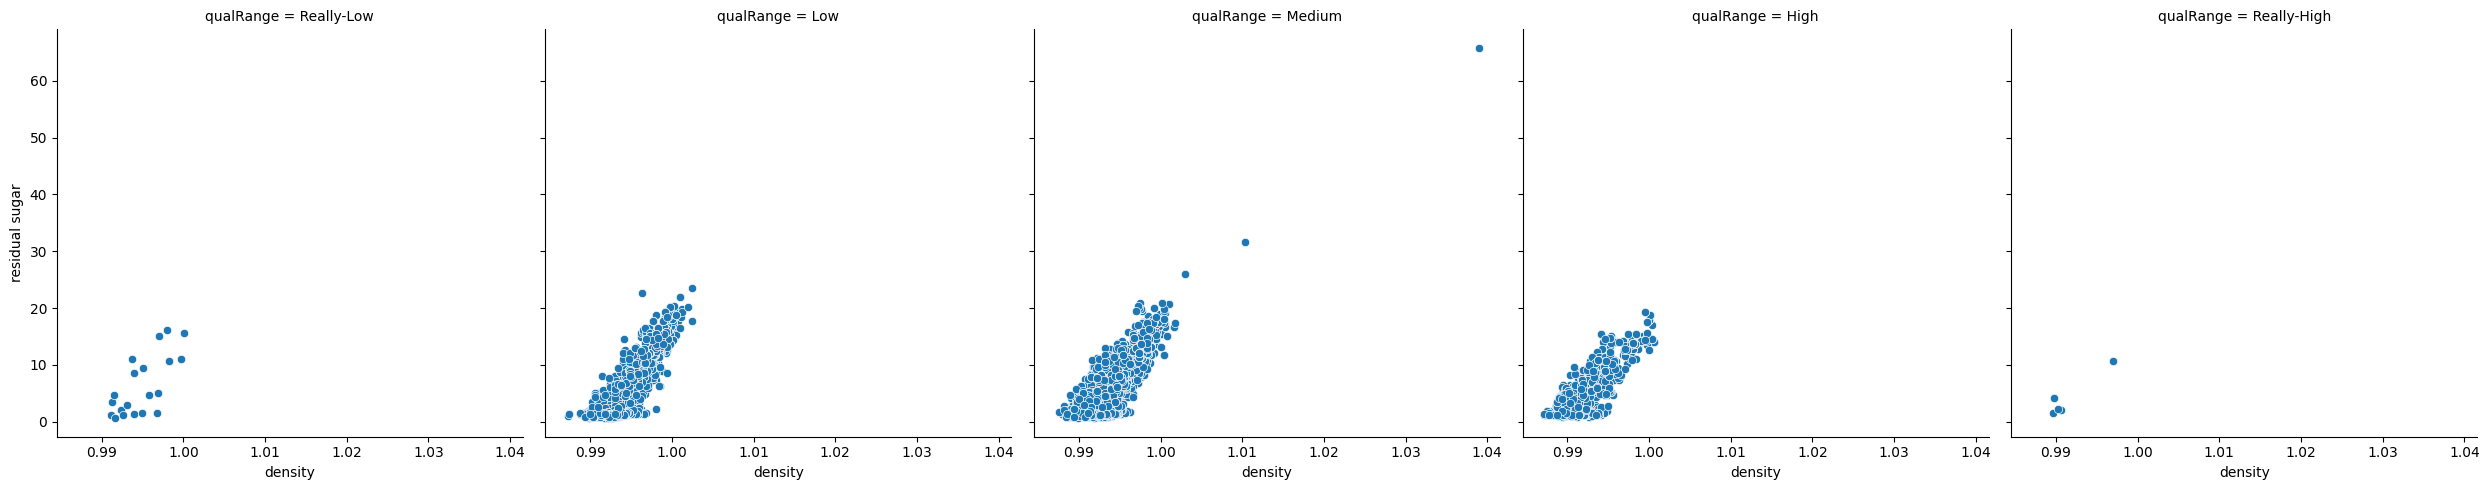

In [16]:
# getting an idea about the distribution of wine density 
sns.relplot(x="density", y="residual sugar", data=df, kind="scatter", col="qualRange")

As we can see the correlation matrix was not lying about the correlation between our 2 couples of variables, since it is clear that we have two linear lines modeling our data

We can now proceed to plot the density of our variables correlated

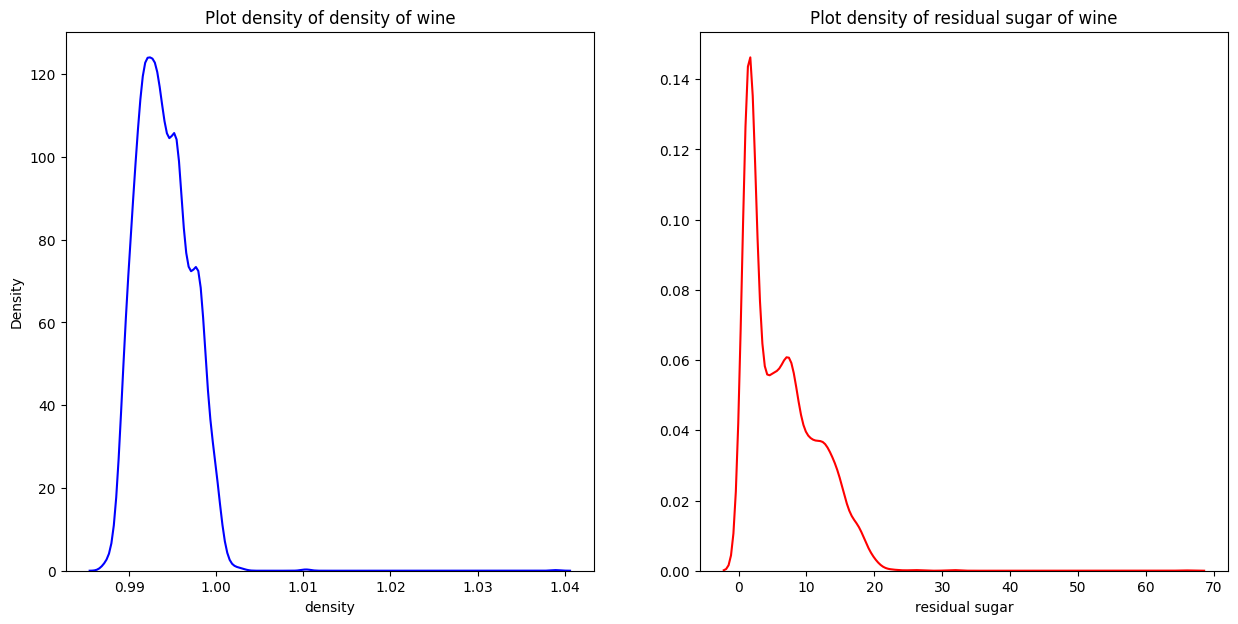

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# getting an idea about the distribution of wine density 
sns.kdeplot(df["density"], ax=ax[0], color='blue')
ax[0].set_title("Plot density of density of wine")  # title

# getting an idea about the distribution of wine residual sugar 
sns.kdeplot(df["residual sugar"], ax=ax[1], color='red')
ax[1].set_title("Plot density of residual sugar of wine")  # title

# plot
plt.ylabel("")
plt.show()

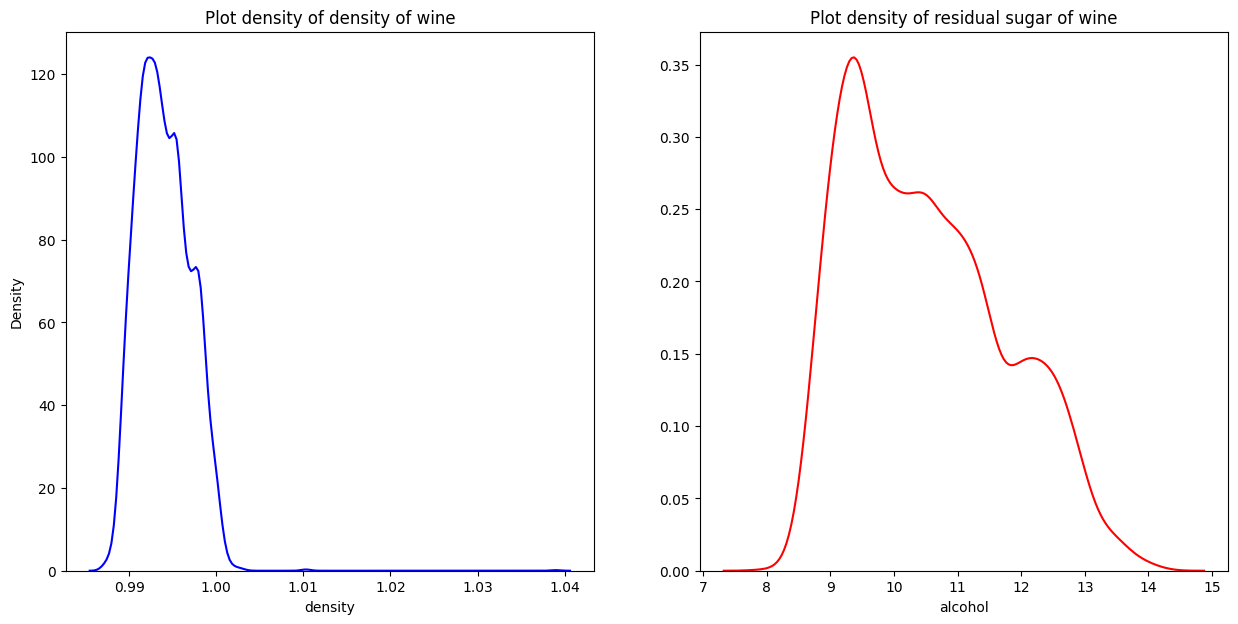

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# getting an idea about the distribution of wine density 
sns.kdeplot(df["density"], ax=ax[0], color='blue')
ax[0].set_title("Plot density of density of wine")  # title

# getting an idea about the distribution of wine alcohol 
sns.kdeplot(df["alcohol"], ax=ax[1], color='red')
ax[1].set_title("Plot density of residual sugar of wine")  # title

# plot
plt.ylabel("")
plt.show()

### **LINEAR REGRESSION**

We now proceed to create a simple linear regression model between our variables with a high value of correlation, for istance we will take "density" and "alcohol"

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [67]:
# our variables
X = df[['density']]  
y = df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We will now analyze 4 models with different variable trasformations:
1. One with no trasformations
2. One with a quadratic trasformation
3. One with a logaritmic trasformation
4. One with a square root trasformation

In [68]:
# first model
model_0 = LinearRegression()

# training with no trasformation
model_0.fit(X_train, y_train)
y_pred_0 = model_0.predict(X_test)

# Pearson correlation coefficient
correlation_coefficient_0, p_value_0 = pearsonr(y_test, y_pred_0)

print('Correlation index with no trasformations:', correlation_coefficient_0)

Correlation index with no trasformations: 0.8140441538974699


In [69]:
# second model
model_1 = LinearRegression()

# training with quadratic trasformation
model_1.fit(X_train*X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Pearson correlation coefficient
correlation_coefficient_1, p_value_1 = pearsonr(y_test, y_pred_1)

print('Correlation index with quadratic trasformation:', correlation_coefficient_1)

Correlation index with quadratic trasformation: 0.8140441538974708


In [70]:
# third model
model_2 = LinearRegression()

# training with logaritmic trasformation
model_2.fit(np.log(X_train), y_train)
y_pred_2 = model_2.predict(X_test)

# Pearson correlation coefficient
correlation_coefficient_2, p_value_2 = pearsonr(y_test, y_pred_2)

print('Correlation index with logaritmic trasformation:', correlation_coefficient_2)

Correlation index with logaritmic trasformation: 0.8140441538974703


In [71]:
# fourth model
model_3 = LinearRegression()

# training with square root trasformation
model_3.fit(np.sqrt(X_train), y_train)
y_pred_3 = model_3.predict(X_test)

# Pearson correlation coefficient
correlation_coefficient_3, p_value_3 = pearsonr(y_test, y_pred_3)

print('Correlation index with square root trasformation:', correlation_coefficient_3)

Correlation index with square root trasformation: 0.8140441538974701


Since all correlation indexes are similar, we proceed to take the linear model with no variable trasformations

In [72]:
# mean squared error
mse = mean_squared_error(y_test, y_pred_0)
print('Mean squared error:', mse)

# r_squared
r2 = r2_score(y_test, y_pred_0)
print('R-squared:', r2)

Mean squared error: 0.5395745778465821
R-squared: 0.6573615140567144
